# USO DE LAS ETAPAS PRIMARIAS DE LA METODOLOGIA CRISP-DM PARA EL ANALISIS DE DATOS DE LOS BIENES INMUEBLES EN LA CIUDAD DE BOGOTÁ




---








# 1. Entendimiento del negocio






## 1.1 Introdución
El mercado inmobiliario en Bogotá, capital de Colombia y una de las ciudades más importantes de América Latina, ha experimentado un crecimiento sostenido en los últimos años. Este crecimiento está impulsado por diversos factores, incluyendo la urbanización acelerada, la creciente demanda de viviendas y el desarrollo de proyectos comerciales. La ciudad ofrece una amplia gama de propiedades, desde apartamentos hasta casas y oficinas, con precios que varían significativamente según la ubicación y las características de la propiedad.

La demanda de viviendas en Bogotá ha sido históricamente alta, motivada por el crecimiento demográfico, la urbanización constante y el incremento en la población de clase media. Para abordar esta demanda, el gobierno ha implementado políticas que promueven la adquisición de viviendas, como programas de subsidios. Estas medidas han tenido un impacto positivo en el mercado inmobiliario y en el acceso a la vivienda para diversos segmentos de la población.

En este contexto, este proyecto de análisis de datos tiene como objetivo examinar y comprender el mercado inmobiliario en Bogotá. A través de un análisis detallado de datos, exploraremos tendencias en precios, preferencias de propiedad, ubicaciones más solicitadas y otros aspectos relevantes. Utilizando herramientas y técnicas de análisis de datos, buscamos proporcionar información valiosa que pueda servir como base para tomar decisiones informadas en el ámbito inmobiliario en la ciudad.



## 1.2 Objetivos de negocio y situación actual


El sector inmobiliario abarca la compra y venta de bienes inmuebles y se rige por la oferta y la demandada:
- Oferta: Bienes inmuebles promocionados en venta
- Demanda: Interes de un grupo de clientes para adquierir los bienes.

La relacion entre estas variables determina el precio de los productos, por lo que el mercado inmobiliario es altamente sensiblea a factores: politicos, economicos y sociales.

Algunos ejemplos comunes de tipos de inmuebles son:
*   Casa
*   Apartamento
*   Terreno
*   Edificios

Así mismo cada inmueble posee distintos usos, entre los cuales destacan:

*   Residencial   
*   Comercial
*   Industrial
*   Desarrollo
*   Inversión

En lo que concierne a Bogotá, la Unidad Administrativa especial de Catastro Digital (UADC), proporciona la siguiente información inmoviliaria para el año 2023:

*   Total de Inmuebles: La ciudad de Bogotá cuenta con un total de 2,776,362 inmuebles, con un valor estimado de 779.1 billones de pesos, representando un incremento del 6.8% en comparación con el año anterior.

*   Distribución Geográfica: Los nuevos predios se han concentrado de manera notable en las localidades de Suba (7,147 predios), Engativá (4,657 predios), Fontibón (4,385 predios) y Usaquén (3,764 predios)¹. Estos datos revelan patrones de desarrollo que pueden ser de gran interés estratégico.

*   Expansión de Área: Además, se han añadido 2.86 millones de metros cuadrados a la ciudad, lo que eleva el área total construida a 299 millones de metros cuadrados.

La magnitud de estos cambios en el censo inmobiliario de Bogotá es importante y subraya la necesidad de un análisis de datos detallado para comprender su impacto en el panorama urbano y económico.

















##1.3 Objetivo del proyecto

**1.3.1 Objetivo General:**


El objetivo general de este proyecto de análisis de datos es explorar el mercado inmobiliario en la ciudad de Bogotá, mediante el uso de datos relevantes, destacando tendencias y correlaciones significativas. Se hará énfasis en la visualización geoespacial para comprender la distribución espacial de las propiedades, así como en el análisis de la relación entre ubicación y precio de las mismas. El propósito es proporcionar insights valiosos y comprensibles que contribuyan a la toma de decisiones informadas para actores clave en el mercado inmobiliario de la ciudtá.




## 1.4 Planeación del proyecto

**1.3.2 Objetivos especificos:**


1.  Caracterizar los bienes inmuebles del DataFrame
2.  Identificar las tendencias geograficas presentes en los bienes inmuebles basandose en localidades o barrios.
3.  Desagregar las Características de los Inmuebles por Ubicación Geográfica
4.  Realizar un analisis de los factores que mas influyen en el precio de los inmuebles, ya sean de renta o venta.
5.  Analizar la demanda de los bienes raices en la ciudad con base en la localidad, identicando zonas de mayor demanda.

# 2. Entendimiento de los datos


## 2.1 Adquisición de los datos

Los datos utilizados en este proyecto fueron recopilados mediante un scraper que rastrea y actualiza los precios de venta de apartamentos en la base de datos. Estas bases de datos son de acceso público y están disponibles en las platadormas: Kaggle y GitHub.

* Kaggle: https://www.kaggle.com/datasets/erik172/bogota-apartments
* GitHub: https://github.com/builker-col/bogota-apartments

## 2.2 Integración de los datos

In [ ]:
# Libraries
# Data processing
import pandas as pd
import numpy as np

# Data stats
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
# Read apartments database into a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/builker-col/bogota-apartments/master/data/processed/apartments.csv', delimiter=',')
apt = df

## 2.2 Análisis exploratorio de los datos: caracterización de los datos

In [ ]:
apt.sample(5)

,codigo,tipo_propiedad,tipo_operacion,precio_venta,precio_arriendo,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,estado,longitud,latitud,descripcion,datetime,website,compañia,fecha_actualizacion_precio_venta,precio_venta_anterior,fecha_actualizacion_precio_arriendo,precio_arriendo_anterior,jacuzzi,piso,closets,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm
2974,13955-M4421525,APARTAMENTO,VENTA,8.800000e+08,NaN,134.00,3.0,3.0,NaN,2.0,SANTA BARBARA,5.0,MAS DE 20 ANOS,USADO,-74.054000,4.691000,"espacios abiertos, te presenta en venta aparta...",2023-06-19 08:01:01.637,metrocuadrado.com,ESPACIOS ABIERTOS,2023-08-19 23:27:05.162,899000000.0,NaN,NaN,0,NaN,NaN,1,0,0,1,0,False,USAQUEN,SANTA BIBIANA,Calle 106,338.57,1
20727,464-M4201713,APARTAMENTO,VENTA,2.060000e+09,NaN,208.82,3.0,5.0,1200000.0,2.0,CHICO,6.0,ENTRE 10 Y 20 ANOS,USADO,-74.057000,4.672000,presentamos magnifico apartamento moderno con ...,2023-06-20 14:31:22.858,metrocuadrado.com,INMOBILIARIA MULTIOBRAS SAS,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,1,1,0,False,CHAPINERO,S.C. ANTIGUO COUNTRY,Calle 85,294.81,1
14124,2361-M3278424,APARTAMENTO,ARRIENDO,NaN,1400000.0,55.00,3.0,1.0,NaN,0.0,ENGATIVA,3.0,MAS DE 20 ANOS,USADO,-74.111000,4.683000,arrienda apartamento ubicado en barrio villa l...,2023-06-19 16:37:35.674,metrocuadrado.com,BIENCO INMOBILIARIA,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,0,False,ENGATIVA,VILLALUZ,Modelia,1164.02,0
39897,2840095,APARTAMENTO,VENTA,3.570000e+08,NaN,68.00,3.0,2.0,176800.0,1.0,CASTILLA,3.0,ENTRE 0 Y 5 ANOS,NaN,-74.144572,4.649287,"apartamento en venta de 68 m2, con vista exter...",2023-07-24 21:54:37.275,habi.co,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,0,False,KENNEDY,BOSCONIA,Tv 86,1835.16,0
23543,11229-M4335441,APARTAMENTO,VENTA,4.650000e+08,NaN,93.00,3.0,2.0,380000.0,1.0,COLINA Y ALREDEDORES,4.0,ENTRE 10 Y 20 ANOS,USADO,-74.059600,4.737542,"se vende hermoso apartamento de 93m2, con vist...",2023-06-22 06:10:18.679,metrocuadrado.com,NaN,NaN,NaN,NaN,NaN,0,6.0,NaN,1,0,1,1,0,False,SUBA,MAZUREN,Mazuren,1190.95,0


In [ ]:
apt.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta',
       'precio_arriendo', 'area', 'habitaciones', 'banos', 'administracion',
       'parqueaderos', 'sector', 'estrato', 'antiguedad', 'estado', 'longitud',
       'latitud', 'descripcion', 'datetime', 'website', 'compañia',
       'fecha_actualizacion_precio_venta', 'precio_venta_anterior',
       'fecha_actualizacion_precio_arriendo', 'precio_arriendo_anterior',
       'jacuzzi', 'piso', 'closets', 'chimenea', 'permite_mascotas',
       'gimnasio', 'ascensor', 'conjunto_cerrado', 'coords_modified',
       'localidad', 'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
       'is_cerca_estacion_tm'],
      dtype='object')


| Columna                              | Descripción                                               |
|--------------------------------------|-----------------------------------------------------------|
| codigo                               | Código único que identifica cada apartamento              |
| tipo_propiedad                       | Tipo de propiedad (apartamento, casa, etc.)               |
| tipo_operacion                       | Tipo de operación (venta, arriendo, etc.)                 |
| precio_venta                         | Precio de venta del apartamento COP                       |
| precio_arriendo                      | Precio de arriendo del apartamento COP                    |
| area                                 | Área del apartamento en metros cuadrados                  |
| habitaciones                         | Número de habitaciones del apartamento                    |
| banos                                | Número de baños del apartamento                           |
| administracion                       | Valor de la cuota de administración del apartamento       |
| parqueaderos                         | Número de parqueaderos disponibles                        |
| sector                               | Sector o zona en la que se encuentra el apartamento       |
| estrato                              | Estrato socioeconómico del apartamento                    |
| antiguedad                           | Antigüedad del apartamento en años                        |
| estado                               | Estado del apartamento (nuevo, usado)                     |
| longitud                             | Longitud geográfica del apartamento                       |
| latitud                              | Latitud geográfica del apartamento                        |
| descripcion                          | Descripción detallada del apartamento                     |
| datetime                             | Fecha y hora de extracción de los datos                   |
| jacuzzi                              | Indica si el apartamento cuenta con jacuzzi               |
| piso                                 | Número de piso en el que se encuentra el apartamento      |
| closets                              | Número de closets en el apartamento                       |
| chimenea                             | Indica si el apartamento cuenta con chimenea              |
| permite_mascotas                     | Indica si se permiten mascotas en el apartamento          |
| gimnasio                             | Indica si el apartamento cuenta con gimnasio              |
| ascensor                             | Indica si el edificio cuenta con ascensor                 |
| conjunto_cerrado                     | Indica si el apartamento se encuentra en conjunto cerrado |
| coords_modified                      | Coordenadas modificadas del apartamento                   |
| localidad                            | Localidad en la que se encuentra el apartamento           |
| barrio                               | Barrio en el que se encuentra el apartamento              |
| estacion_tm_cercana                  | Nombre de la estacion de transporte masivo mas cercana    |
| distancia_estacion_tm_m              | Distancia a la estación de transporte masivo más cercana  |
| is_cerca_estacion_tm                    | Indica si está cerca de una estación de transporte masivo |
| website                              | Sitio web relacionado a la propiedad                      |
| compañia                             | Compañía o agencia responsable de la propiedad            |
| fecha_actualizacion_precio_venta     | Fecha de actualización del precio de venta (scrapeado)    |
| precio_venta_anterior                | Precio de venta anterior de la propiedad COP              |
| fecha_actualizacion_precio_arriendo  | Fecha de actualización del precio de arriendo (scrapeado) |
| precio_arriendo_anterior             | Precio de arriendo anterior de la propiedad COP           |

In [ ]:
# Numeric variables
var_numeric = (['precio_venta',
                'precio_arriendo',
                'area',
                'habitaciones',
                'banos',
                'administracion',
                'parqueaderos',
                'longitud',
                'latitud',
                'fechas',
                'precio_arriendo_anterior',
                'piso',
                'closets',
                'distancia_estacion_tm_m'])

In [ ]:
# Categorical variables
var_categorical = (['codigo',
                    'tipo_propiedad',
                    'tipo_operacion',
                    'sector',
                    'estrato',
                    'antiguedad',
                    'estado',
                    'descripcion',
                    'datetime',
                    'website',
                    'compañia',
                    'jacuzzi',
                    'closets',
                    'chimenea',
                    'permite_mascotas',
                    'gimnasio',
                    'ascensor',
                    'conjunto_cerrado',
                    'coords_modified',
                    'localidad',
                    'barrio',
                    'estacion_tm_cercana',
                    'is_cerca_estacion_tm'])

Se precisa ver los valores mas frecuentes en algunas de las mas importantes variables categoricas

In [ ]:
estrato = (
    apt
    .estrato
    .value_counts()
)
estrato

6.0    25949
4.0    13540
5.0    11592
3.0     9405
2.0     2495
1.0      204
0.0       40
Name: estrato, dtype: int64

In [ ]:
def quitar_na(a,b):


In [ ]:
operacion = (
    apt
    .tipo_operacion
    .value_counts()
)
operacion

VENTA               43755
ARRIENDO            19075
VENTA Y ARRIENDO      415
Name: tipo_operacion, dtype: int64

In [ ]:
venta_localidad = (
    apt
    .query("tipo_operacion == 'VENTA' or tipo_operacion == 'VENTA O ARRIENDO'")
    .localidad
    .value_counts()
)
venta_localidad

USAQUEN               16477
CHAPINERO             10868
SUBA                   7837
KENNEDY                1681
FONTIBON               1521
ENGATIVA               1291
TEUSAQUILLO            1193
SANTA FE                630
BOSA                    564
BARRIOS UNIDOS          471
CIUDAD BOLIVAR          263
PUENTE ARANDA           252
LOS MARTIRES            187
USME                    133
RAFAEL URIBE URIBE      117
CANDELARIA               89
ANTONIO NARINO           72
SAN CRISTOBAL            69
TUNJUELITO               40
Name: localidad, dtype: int64

In [ ]:
arriendo_localidad = (
    apt
    .query("tipo_operacion == 'ARRIENDO' or tipo_operacion == 'VENTA O ARRIENDO'")
    .localidad
    .value_counts()
)
arriendo_localidad

CHAPINERO             6115
USAQUEN               5868
SUBA                  2247
ENGATIVA               710
KENNEDY                664
FONTIBON               641
TEUSAQUILLO            618
SANTA FE               541
PUENTE ARANDA          410
BARRIOS UNIDOS         348
BOSA                   162
LOS MARTIRES           156
CIUDAD BOLIVAR         153
RAFAEL URIBE URIBE     127
CANDELARIA              87
SAN CRISTOBAL           86
ANTONIO NARINO          81
TUNJUELITO              43
USME                    18
Name: localidad, dtype: int64

In [ ]:
sector = (
    apt
    .sector
    .value_counts()
)
sector

CHICO                   13653
SANTA BARBARA           10577
COUNTRY                  5372
COLINA Y ALREDEDORES     4518
CEDRITOS                 4025
                        ...  
RESTREPO                    1
VENECIA                     1
SAN RAFAEL                  1
LOS ALCAZARES               1
TEUSAQUILLO                 1
Name: sector, Length: 102, dtype: int64

In [ ]:
antiguedad = (
    apt
    .antiguedad
    .value_counts()
)
antiguedad

MAS DE 20 ANOS        21452
ENTRE 10 Y 20 ANOS    16312
ENTRE 0 Y 5 ANOS      11769
ENTRE 5 Y 10 ANOS     11419
REMODELADO             2265
Name: antiguedad, dtype: int64

In [ ]:
compania = (
    apt
    .compañia
    .value_counts()
)
compania

ENGEL & VOLKERS                 1113
INMOBILIARIA BOGOTA             1093
JULIO CORREDOR Y CIA. LTDA.     1043
HOUM                             949
PADS                             949
                                ... 
INMOBILIARIA ALFA FINCA RAIZ       1
CENTRO EMPRESARIAL UNICENTRO       1
CASA LUBER INMOBILIARIA            1
GESTIONES AL CUADRADO              1
DIANA HELENA ESPINOSA MADRID       1
Name: compañia, Length: 807, dtype: int64

## 2.3 Análisis exploratorio de datos: descripción con estadistica descriptiva

### 2.3.1 Precio de venta

In [ ]:
# Gets the mean, median, and standar deviation for apartments sale price.
# Grouped by localidad
precio_venta_des = (
    apt
    .groupby('localidad')
    .agg({
        'precio_venta': ['mean',
                         'median',
                         'std',
                         'min',
                         'max',
                         lambda x: x.quantile(0.25),
                         lambda x: x.quantile(0.75)]
    })
)

# Format data as money
precio_venta_des = (
    precio_venta_des
    .applymap(lambda x:'${:,.2f}'.format(x))
)

# Change column names
precio_venta_des.columns = ('mean', 'meadian', 'std', 'min', 'max', 'percentil25', 'percentil75')

precio_venta_des.sort_values(by='mean', ascending=False)

,mean,meadian,std,min,max,percentil25,percentil75
localidad,,,,,,,
SUBA,"$592,600,142.19","$470,000,000.00","$462,854,818.39","$1,100,000.00","$7,200,000,000.00","$321,200,000.00","$690,000,000.00"
TEUSAQUILLO,"$563,747,582.56","$515,000,000.00","$305,595,163.10","$550,000.00","$5,200,000,000.00","$400,000,000.00","$650,000,000.00"
CANDELARIA,"$540,971,548.42","$400,000,000.00","$733,422,434.92","$108,000,000.00","$6,300,000,000.00","$270,000,000.00","$490,000,000.00"
BARRIOS UNIDOS,"$506,752,692.28","$460,000,000.00","$240,495,118.10","$1,000,000.00","$2,600,000,000.00","$360,000,000.00","$550,000,000.00"
FONTIBON,"$481,148,930.95","$390,000,000.00","$371,780,243.72","$790,000.00","$3,500,000,000.00","$250,000,000.00","$559,000,000.00"
PUENTE ARANDA,"$367,874,106.72","$350,000,000.00","$187,961,500.30","$103,500,000.00","$1,750,000,000.00","$230,000,000.00","$450,000,000.00"
ANTONIO NARINO,"$323,473,611.11","$260,000,000.00","$344,506,588.58","$140,000,000.00","$3,100,000,000.00","$223,750,000.00","$330,000,000.00"
ENGATIVA,"$309,218,516.01","$280,000,000.00","$171,924,658.61","$245,000.00","$2,700,000,000.00","$225,000,000.00","$347,000,000.00"
BOSA,"$3,657,731,456.63","$129,000,000.00","$83,629,954,753.60","$95,200,000.00","$1,988,000,000,000.00","$122,000,000.00","$140,000,000.00"


In [ ]:
# Gets the mean, median, and standar deviation for apartments area.
# Grouped by localidad
area_des = (
    apt
    .groupby('localidad')
    .agg({
        'area': ['mean',
                 'median',
                 'std',
                 'min',
                 'max',
                 lambda x: x.quantile(0.25),
                 lambda x: x.quantile(0.75)]
    })
)

area_des.sort_values(by=('area', 'mean'), ascending=False)

area                                        \
                          mean   median          std   min       max   
localidad                                                              
CHAPINERO           179.934951  153.000   382.819900   0.0   28890.0   
TEUSAQUILLO         144.592119   77.840  2653.201687   0.0  113000.0   
USAQUEN             137.159090  108.000   265.323231   0.0   19621.0   
SANTA FE            134.404664   51.800  2275.695852   0.0   78000.0   
FONTIBON            115.238312   65.000  1655.491864   0.0   76645.0   
SUBA                104.327926   84.000   158.942267   0.0    9242.0   
KENNEDY              92.716431   54.000  1671.969260   0.0   81015.0   
TUNJUELITO           83.631928   54.000   184.854812  25.0    1700.0   
BARRIOS UNIDOS       82.896325   77.000    44.408991   0.0     404.0   
ENGATIVA             67.273493   61.380   102.564261   0.0    4500.0   
PUENTE ARANDA        67.046767   60.775    30.538431   0.0     433.0   
ANTONIO NARINO       66.270131   60.000    32.261024  20.0     307.0   
CANDELARIA           61.214432   46.500    74.183408  20.0     700.0   
RAFAEL URIBE URIBE   57.845697   52.000    32.674655  17.0     450.0   
LOS MARTIRES         55.159621   43.360    28.374451   0.0     200.0   
SAN CRISTOBAL        53.747419   50.000    18.603077  29.0     180.0   
CIUDAD BOLIVAR       51.833173   51.000    12.671751  28.0     200.0   
BOSA                 47.325303   47.000     9.828208   0.0     184.0   
USME                 47.319338   48.000     7.160250  33.0     110.0   

                                          
                   <lambda_0> <lambda_1>  
localidad                                 
CHAPINERO             89.5400    235.340  
TEUSAQUILLO           50.0000    104.000  
USAQUEN               73.8050    168.000  
SANTA FE              35.0000     76.000  
FONTIBON              51.0000     85.000  
SUBA                  62.4075    117.000  
KENNEDY               47.0000     66.000  
TUNJUELITO            47.0000     60.000  
BARRIOS UNIDOS        54.0000     96.000  
ENGATIVA              51.0000     73.000  
PUENTE ARANDA         50.0000     78.975  
ANTONIO NARINO        48.0000     75.000  
CANDELARIA            30.0000     60.000  
RAFAEL URIBE URIBE    45.8750     61.000  
LOS MARTIRES          33.5850     71.160  
SAN CRISTOBAL         45.0000     59.500  
CIUDAD BOLIVAR        44.0000     59.000  
BOSA                  43.0000     49.000  
USME                  44.0000     50.000

A continuación se insertan los datos inmobiliarios:

In [ ]:
pd.set_option('display.max_columns', None)
apt.head()
apt.query('tipo_operacion == "ARRIENDO"')

,codigo,tipo_propiedad,tipo_operacion,precio_venta,precio_arriendo,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,estado,longitud,latitud,descripcion,datetime,website,compañia,fecha_actualizacion_precio_venta,precio_venta_anterior,fecha_actualizacion_precio_arriendo,precio_arriendo_anterior,jacuzzi,piso,closets,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm
9463,4969-M4036562,APARTAMENTO,ARRIENDO,NaN,7100000.0,160.0,2.0,3.0,700000.0,2.0,SANTA BARBARA,6.0,ENTRE 5 Y 10 ANOS,USADO,-74.048485,4.687796,"santa bibiana , lindo apartamento amoblado, $7...",2023-06-19 12:54:25.156,metrocuadrado.com,JROMEROBIENESINMUEBLES,NaN,NaN,NaN,NaN,0,2.0,3.0,1,0,1,1,1,False,USAQUEN,SANTA BIBIANA,Calle 106,1038.02,0
9464,3702-M4422710,APARTAMENTO,ARRIENDO,NaN,4101000.0,150.0,2.0,3.0,899000.0,1.0,CHICO,4.0,MAS DE 20 ANOS,USADO,-74.055340,4.656380,"150 m2 totalmente remodelado, dos alcobas prin...",2023-06-19 12:54:27.442,metrocuadrado.com,ALINA INMOBILIARIA,NaN,NaN,2023-07-20 04:10:53.678,5500000.0,0,2.0,2.0,0,1,0,1,0,False,CHAPINERO,S.C. PORCIUNCULA,Calle 72,774.85,0
9465,10139-M4369601,APARTAMENTO,ARRIENDO,NaN,8500000.0,105.0,2.0,2.0,NaN,1.0,CHICO,6.0,ENTRE 0 Y 5 ANOS,USADO,-74.053215,4.655403,magnifico apartamento amoblado para arriendo d...,2023-06-19 12:54:29.702,metrocuadrado.com,DIANA RODRIGUEZ FERNANDEZ,NaN,NaN,NaN,NaN,0,11.0,1.0,0,0,0,1,0,False,CHAPINERO,S.C. BELLAVISTA,Calle 72,1031.65,0
9466,10139-M4081445,APARTAMENTO,ARRIENDO,NaN,15000000.0,265.0,3.0,3.0,1165000.0,3.0,CHICO,6.0,REMODELADO,USADO,-74.051420,4.658620,magnifico apartamento de 265 mts remodelado pa...,2023-06-19 12:54:32.046,metrocuadrado.com,DIANA RODRIGUEZ FERNANDEZ,NaN,NaN,NaN,NaN,0,1.0,1.0,0,0,1,1,0,False,CHAPINERO,S.C. BELLAVISTA,Calle 72,1182.16,0
9467,293-M4427081,APARTAMENTO,ARRIENDO,NaN,1670000.0,85.0,3.0,2.0,360000.0,1.0,ENGATIVA,3.0,ENTRE 5 Y 10 ANOS,USADO,-74.125000,4.720000,lindo apartamento de vista exterior con excele...,2023-06-19 12:54:34.467,metrocuadrado.com,NaN,NaN,NaN,NaN,NaN,0,NaN,1.0,0,0,0,1,1,False,ENGATIVA,GRAN GRANADA,Quirigua,2387.74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63240,112-M4556155,APARTAMENTO,ARRIENDO,NaN,500000.0,159.0,2.0,2.0,NaN,1.0,METROPOLIS,3.0,ENTRE 0 Y 5 ANOS,USADO,-74.073030,4.674014,prueba prueba prueba prueba prueba prueba prue...,2023-09-10 15:49:39.889,metrocuadrado.com,METRO CAPACITACIONES,NaN,NaN,NaN,NaN,0,2.0,NaN,0,0,0,0,0,False,BARRIOS UNIDOS,JORGE ELIECER GAITAN,NQS - Calle 75,434.34,1
63241,252-M2589100,APARTAMENTO,ARRIENDO,NaN,1250000.0,44.0,1.0,1.0,250000.0,0.0,CHICO,4.0,MAS DE 20 ANOS,USADO,-74.060770,4.661694,"apartamento de una alcoba y un bano, ubicado e...",2023-09-10 15:57:26.211,metrocuadrado.com,BIVALO INMOBILIARIA S.A.S,NaN,NaN,NaN,NaN,0,4.0,1.0,0,0,0,1,0,False,CHAPINERO,S.C. PORCIUNCULA,Calle 76,144.98,1
63242,2147-M4557441,APARTAMENTO,ARRIENDO,NaN,6100000.0,84.0,2.0,2.0,650000.0,2.0,CHICO,6.0,ENTRE 0 Y 5 ANOS,USADO,-74.046530,4.666519,"apto super lindo con vista al occidente, muy b...",2023-09-10 16:00:44.874,metrocuadrado.com,BETHEL CONSTRUCTORA INMOBILIARIA SAS,NaN,NaN,NaN,NaN,0,8.0,NaN,0,0,1,0,1,False,CHAPINERO,LA CABRERA,Héroes,1544.36,0
63243,MC2101925,APARTAMENTO,ARRIENDO,NaN,650000.0,25.0,1.0,1.0,NaN,0.0,CHAPINERO,3.0,ENTRE 0 Y 5 ANOS,USADO,-74.075745,4.654183,"apartamento segundo piso, interior, area 25 me...",2023-09-10 16:47:20.801,metrocuadrado.com,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,0,0,0,0,False,BARRIOS UNIDOS,BENJAMIN HERRERA,Coliseo,373.99,1


In [ ]:
apt.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta',
       'precio_arriendo', 'area', 'habitaciones', 'banos', 'administracion',
       'parqueaderos', 'sector', 'estrato', 'antiguedad', 'estado', 'longitud',
       'latitud', 'descripcion', 'datetime', 'website', 'compañia',
       'fecha_actualizacion_precio_venta', 'precio_venta_anterior',
       'fecha_actualizacion_precio_arriendo', 'precio_arriendo_anterior',
       'jacuzzi', 'piso', 'closets', 'chimenea', 'permite_mascotas',
       'gimnasio', 'ascensor', 'conjunto_cerrado', 'coords_modified',
       'localidad', 'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
       'is_cerca_estacion_tm'],
      dtype='object')

In [ ]:
def es_numero(valor):
    return isinstance(valor, (int, float))

# Aplicar la función a cada celda del DataFrame
mascara_numerica = apt.applymap(es_numero)

# Verificar si hay al menos un valor numérico en cada columna
columnas_con_numeros = mascara_numerica.any()

print(columnas_con_numeros)



codigo                                 False
tipo_propiedad                         False
tipo_operacion                         False
precio_venta                            True
precio_arriendo                         True
area                                    True
habitaciones                            True
banos                                   True
administracion                          True
parqueaderos                            True
sector                                  True
estrato                                 True
antiguedad                              True
estado                                  True
longitud                                True
latitud                                 True
descripcion                             True
datetime                               False
website                                False
compañia                                True
fecha_actualizacion_precio_venta        True
precio_venta_anterior                   True
fecha_actu

In [ ]:
precio_bosa = apt.query('localidad == "BOSA"')['precio_venta']
precio_bosa = precio_bosa.dropna()
type(precio_bosa)
print(precio_bosa.sort_values(ascending = False).head(50))
precio_bosa2 = precio_bosa.reset_index()

30156    1.988000e+12
5791     1.308000e+09
27763    1.100000e+09
39330    4.900000e+08
33133    3.812860e+08
8403     3.600000e+08
57827    3.570000e+08
1170     3.100000e+08
41994    2.980000e+08
53231    2.803000e+08
34229    2.600000e+08
43504    2.500000e+08
24488    2.350000e+08
51491    2.350000e+08
41936    2.200000e+08
53259    2.000000e+08
52338    2.000000e+08
6128     1.950000e+08
32606    1.900000e+08
22741    1.850000e+08
39309    1.850000e+08
58774    1.840000e+08
57809    1.820000e+08
23315    1.820000e+08
27051    1.820000e+08
39591    1.820000e+08
26084    1.820000e+08
32704    1.800000e+08
5701     1.799900e+08
23210    1.750000e+08
5958     1.750000e+08
59156    1.750000e+08
4974     1.750000e+08
44498    1.750000e+08
61478    1.750000e+08
43419    1.730000e+08
58886    1.700000e+08
33090    1.700000e+08
55687    1.700000e+08
51011    1.700000e+08
48871    1.670000e+08
2330     1.650000e+08
28809    1.650000e+08
26649    1.630000e+08
27877    1.630000e+08
33057    1

In [ ]:
precio_bosa2['precio_venta'].sort_values(ascending = False)

206    1.988000e+12
57     1.308000e+09
177    1.100000e+09
259    4.900000e+08
225    3.812860e+08
           ...     
257    9.990000e+07
245    9.800000e+07
142    9.800000e+07
191    9.700000e+07
251    9.520000e+07
Name: precio_venta, Length: 565, dtype: float64

In [ ]:
precio_bosa3 = precio_bosa2.query('precio_venta < 1000000000')
precio_bosa4 = precio_bosa3.query('precio_venta < 160000000')

In [ ]:
precio_bosa3['precio_venta'].sort_values()

251     95200000.0
191     97000000.0
142     98000000.0
245     98000000.0
257     99900000.0
          ...     
5      310000000.0
534    357000000.0
86     360000000.0
225    381286000.0
259    490000000.0
Name: precio_venta, Length: 562, dtype: float64

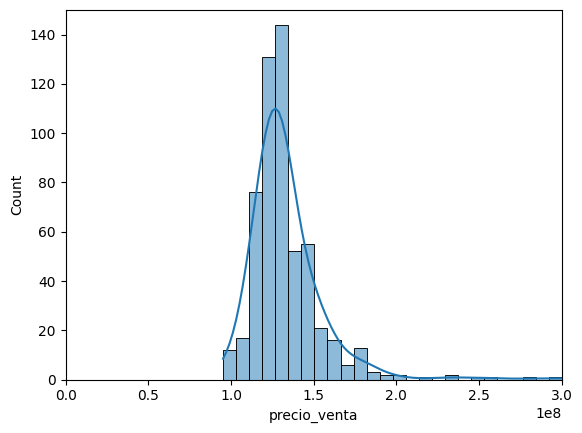

<Figure size 800x600 with 0 Axes>

In [ ]:
# Supongamos que tienes un arreglo de datos llamado 'precio_bosa'
holu = sns.histplot(x = 'precio_venta', kde=True, bins=50, data = precio_bosa3)  # Ajusta el número de bins según tus preferencias
plt.figure(figsize=(8, 6))
holu.set_xlim([0, 300000000])
holu.set_ylim([0, 150])

# Muestra el gráfico
plt.show()







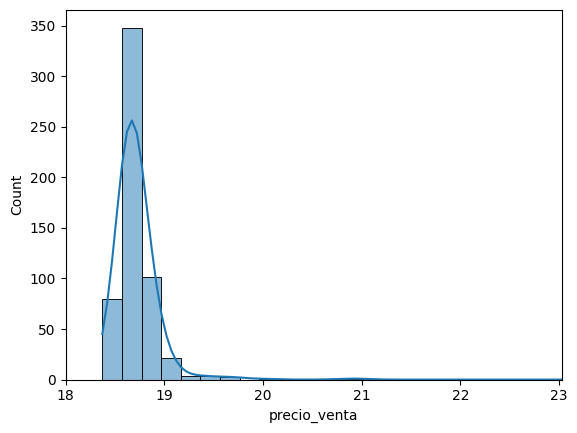

In [ ]:

# Aplica una transformación logarítmica a tus datos
precio_bosa_log = np.log1p(precio_bosa)

# Crea el histograma en escala logarítmica
holu = sns.histplot(precio_bosa_log, kde=True, bins=50)
holu.set_xlim([18, np.log1p(10000000000)])  # Ajusta el límite superior en escala logarítmica

# Muestra el gráfico
plt.show()

In [ ]:
statistic, p_value = stats.shapiro(precio_bosa4)

# Imprime los resultados
print(f'Estadístico de prueba: {statistic}')
print(f'Valor p: {p_value}')

# Comprueba la significancia
alpha = 0.05
if p_value > alpha:
    print('No se rechaza la hipótesis nula. Los datos parecen seguir una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')

Estadístico de prueba: 0.7159894108772278
Valor p: 2.0190620133611841e-38
Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.


In [ ]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=localidades_frecuentes.index, y=localidades_frecuentes.values, palette="viridis")

NameError: ignored

<Figure size 1000x600 with 0 Axes>

In [ ]:
conteo_nan_por_columna = apt.isna().sum()

# Si deseas contar los NaN y expresarlos como porcentaje en lugar de número absoluto:
porcentaje_nan_por_columna = (apt.isna().mean() * 100).round(2)

# Crear un nuevo DataFrame o serie para mostrar los resultados
resultado = pd.DataFrame({'Total de NaN': conteo_nan_por_columna, 'Porcentaje de NaN': porcentaje_nan_por_columna})
resultado_1 = resultado['Total de NaN'].sort_values(ascending = False).head(8)
# Mostrar el resultado
print(resultado_1)

In [ ]:
resultado_1 = resultado['Total de NaN'].sort_values(ascending = False).head(12)
# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=resultado_1.index, y=resultado_1.values, palette="viridis")

# Añadir etiquetas y título
plt.xlabel('Valores de NaN')
plt.ylabel('Conteo')
plt.title('Valores de NaN segun cada variable')

# Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
print(apt['estrato'].value_counts())
print("-" * 80)
print(apt['tipo_operacion'].value_counts())
print("-" * 80)
print(apt['localidad'].value_counts())
print("-" * 80)
print(apt['tipo_propiedad'].value_counts())
print("-" * 80)
print(apt['antiguedad'].value_counts())
print("-" * 80)
print(apt['compañia'].value_counts().head(30))
print("-" * 80)
#apt.loc(apt[,])
apt.info()
print("-" * 80)


In [ ]:
sns.countplot(x = 'estrato', data = apt)

In [ ]:
# Contar la frecuencia de cada localidad
localidades_frecuentes = apt['localidad'].value_counts().head(8)

# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=localidades_frecuentes.index, y=localidades_frecuentes.values, palette="viridis")

# Añadir etiquetas y título
plt.xlabel('Localidad')
plt.ylabel('Frecuencia')
plt.title('Localidades más frecuentes')

# Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



In [ ]:
# Contar la frecuencia de cada localidad
localidades_frecuentes = apt['tipo_operacion'].value_counts()

# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=localidades_frecuentes.index, y=localidades_frecuentes.values, palette="viridis")

# Añadir etiquetas y título
plt.xlabel('Tipo de operación')
plt.ylabel('Frecuencia')
plt.title('Conteo del tipo de operaciones')

# Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
# Contar la frecuencia de cada localidad
localidades_frecuentes = apt['compañia'].value_counts().head(8)

# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=localidades_frecuentes.index, y=localidades_frecuentes.values, palette="viridis")

# Añadir etiquetas y título
plt.xlabel('Compañias mas frecuentes')
plt.ylabel('Frecuencia')
plt.title('Compañia')

# Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#

In [ ]:
# Contar la frecuencia de cada localidad
localidades_frecuentes = apt['antiguedad'].value_counts().head(8)

# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=localidades_frecuentes.index, y=localidades_frecuentes.values, palette="viridis")

# Añadir etiquetas y título
plt.xlabel('Antiguedad')
plt.ylabel('Frecuencia')
plt.title('Antiguedad de los inmuebles')

# Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Se puede observar que las variables con valores faltantes son:


In [ ]:
val_falt = ["precio_venta", "precio_arriendo", 'area', 'habitaciones', 'banos', 'administracion', 'parqueaderos', '']

In [ ]:
apt['localidad'].unique()


In [ ]:
apt['sector']

In [ ]:
apt.describe()

### Análisis con estadistica descriptiva

### Visualización primaria de los datos

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
apt.round(1)
apt.mean(numeric_only = True)

In [ ]:
hola = apt.groupby('estrato').agg({'area' : np.mean, 'precio_venta' : np.mean})
def precio(a):
  return '${:,.2f}'.format(a)
hola['precio_venta'] = hola['precio_venta'].apply(precio)
print(hola)


In [ ]:
hola = apt.groupby('localidad').agg({'area' : np.mean, 'precio_venta' : np.mean})
def precio(a):
  return '${:,.2f}'.format(a)
hola['precio_venta'] = hola['precio_venta'].apply(precio)
print(hola)


In [ ]:
hola = apt.groupby('localidad').agg({'area' : np.mean, 'precio_venta' : np.mean})
def precio(a):
  return '${:,.2f}'.format(a)
hola['precio_venta'] = hola['precio_venta'].apply(precio)
print(hola)


In [ ]:
hola3 = apt.query('tipo_operacion == "venta" or tipo_operacion == "venta y arriendo"')
hola2= apt.query('localidad == "SANTA FE" and precio_venta > 1000000000')
hola2
#hola3 = apt.query('localidad == "ENGATIVA" )

In [ ]:
hola3 = apt.query('tipo_operacion == "VENTA" or tipo_operacion == "VENTA Y ARRIENDO"')
hola3

In [ ]:
hola3.query('localidad == "ENGATIVA"').sort_values(by='precio_venta', ascending=False).head(30)

In [ ]:
hola3['localidad'].value_counts()

In [ ]:
#sns.lmplot(x = 'estrato', y = 'precio_venta', data = apt)
plt.figure(figsize=(16, 6))
sns.scatterplot(data = apt,        # Conjunto de datos
                x="localidad",   # Variable del eje X
                y="precio_venta")
plt.xticks(rotation=45)



In [ ]:
#sns.lmplot(x = 'estrato', y = 'precio_venta', data = apt)
plt.figure(figsize=(16, 6))
sns.scatterplot(data = apt,        # Conjunto de datos
                x="precio_venta",   # Variable del eje X
                y="localidad")
plt.xticks(rotation=45)



## Preparación de los datos

## 3.1 Limpieza de datos

## Selección de características

### Preprocesamiento y transformación de los datos

## Análisis de datos

### Técnicas estadísticas tradicionales

### Análisis de correlación y/o análisis de regresión

### Análisis de resultados y cumplimiento de objetivos

## Visualización de resultados

### Abstracción y definición de las visualizaciones


### Visualización de información estática e interactiva

### Visualización de mapas corropléticos